In [31]:
from IPython.display import Latex
from IPython.display import Image
from IPython.core.display import HTML 

Цель работы: с помощью оборотного маятника измерить величину ускорения свободного падения.

Оборудование: оборотный маятник с двумя подвесными призмами и двумя грузами (чечевицами); электронный счётчик времени и числа колебаний; подставка с острием для определения положения центра масс маятника; закреплённая на стене консоль для подвешивания маятника; металлические линейки, штангенциркуль длиной 1 м.

Физический маятник - твёрдое тело, способное совершать 
колебания в вертикальной плоскости, будучи подвешено за одну из своих 
точек в поле тяжести. Ось, проходящая через точку подвес перпендикулярно плоскости качания, называется осью качания маятника. 
При малых колебаниях период колебаний физического маятника определяется формулой: $$T = 2\pi\sqrt{\frac{I}{mgl}}\quad (1)$$
где I - момент инерциимаятника относительно оси качания, m - масса 
маятника, l -расстояние от оси качания до центра масс маятника. Если сравнить (1) с известной формулой колебаний математического 
маятника длиной l ($T = 2\pi\sqrt{\frac{l}{g}}$) определить приведённую длину физического маятника как: 
$$l_{\text{пр}} = \frac{I}{ml} \quad (2)$$

![image](Рис.1.png)

Пусть $O_{1}$ - точка подвеса физического маятника, а 
C - его центр масс. Отложим отрезок длиной $l_{пр}$ вдоль 
линии $O_{1}C$, и обозначим соответствующую точку как $O_{2}$ — эту точку называют центром качания физического маятника. Заметим, что приведённая длина всегда больше расстояния до центра масс, поэтому точка $O_{2}$ лежит по другую сторону от центра масс.
Точки $O_{1}$ и $O_{2}$ обладают свойством взаимности: 
если перевернуть маятник и подвесить его за точку $O_{2}$
то его период малых колебаний останется таким же, как 
и при подвешивании за точку $O_{1}$.
$$T_{1} = 2\pi\sqrt{\frac{I_{1}}{mgl_{1}}}, \quad T_{2} = 2\pi\sqrt{\frac{I_{2}}{mgl_{2}}} \quad (3)$$
$$I_{1} = I_{c} + ml_{1}^2, \quad I_{2} = I_{c} + ml_{2}^2 \quad (4)$$
где $I_{c}$ - момент инерции относительно оси, проходящей через точку С.
$$I_{c} = ml_{1}l_{2} \quad (5)$$

Посчитаем $T_{min}$ (минимум времени колебаний). Для этого возьмем производную от вот этого куска формулы (3), подставив формулу (4).
$$g = \frac{I_{c} + ml_{1}^2}{mgl_{1}} \quad (6)$$
Приравняем ее к нулю и увидим что в этой точке $l_{1min}$:
$$l_{1min} = \sqrt{\frac{I_{c}}{m}} \quad (7)$$
Из формул (1) и (2) выведем $g$:
$$g = \frac{4l_{пр}\pi^2}{T^2} \quad (8)$$
Так как идеального соответствия между $T_{1}$ и $T_{2}$ добиться невозможно то из формул (3), (4) и (5) можно выразить $g$:
$$g = 4\pi^2 \frac{l_{1}^2 - l_{2}^2}{T_{1}^2l_{1} - T_{2}^2l_{2}} \quad (9)$$

Проведем 3 измерения сотни колебаний и запишем данные в csv. Теперь приступим к обработке данных.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt, pi

In [33]:
p = pd.read_csv("data.csv")
p

,y,x
0,0.213180,0.398100
1,0.168308,0.318100
2,0.111480,0.208380
3,0.136560,0.255890
4,0.088099,0.164835
5,0.072395,0.135880
6,0.057532,0.108330
7,0.051171,0.088604
8,0.035048,0.066074


In [34]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= p["x"], ydata=p["y"], )
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 0.53 ± 0.0047
b = 0.00107 ± 0.001


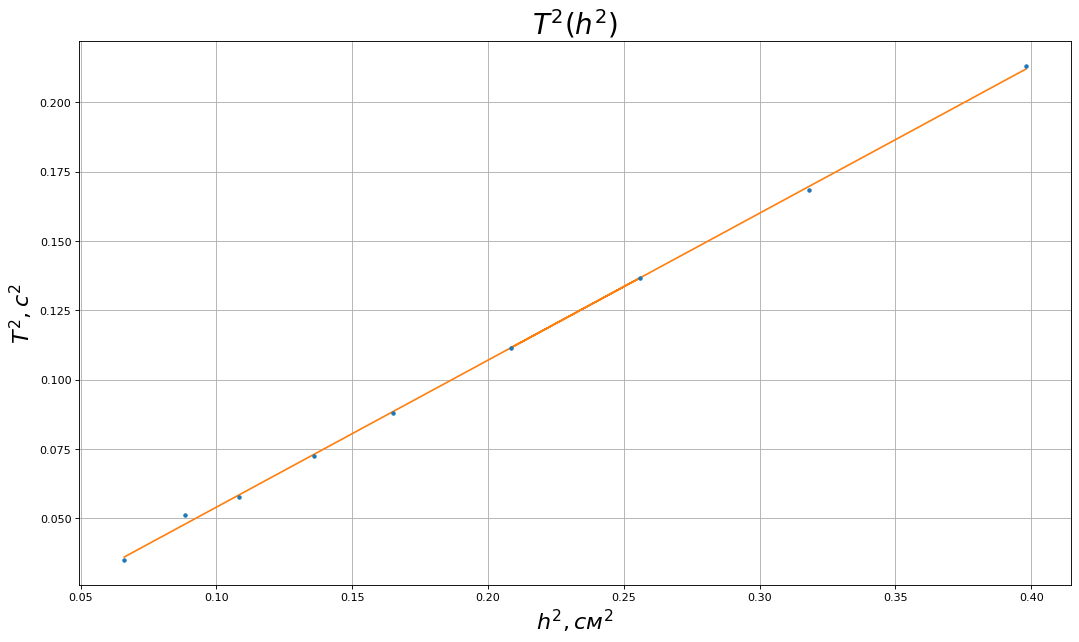

In [36]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=p["x"], y=p["y"], fmt='.')
plt.title(r"$T^2(h^2)$", fontsize=25)
plt.xlabel(r"$h^2, см^2$", fontsize=20)
plt.ylabel(r"$T^2, с^2$", fontsize=20)
plt.grid(True)
plt.plot(p["x"], line(p["x"], params[0], params[1]), label="Истиная зависимость")